<a href="https://colab.research.google.com/github/nechebarrena/HOML/blob/main/HOML_cap_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPITULO 10 - HANDS ON MACHINE LEARNING**
## **Una introduccion a las redes neuronales con Keras**



En este capitulo vamos a introducir por primera vez la API Keras. En particular vamos a utilizar la implementacion para TensorFlow.

In [1]:
!python3 -m pip install --upgrade tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
print('Version de Tensor Flow ==> ',tf.__version__)
print('Version de Keras ==> ',keras.__version__)

Version de Tensor Flow ==>  2.5.0
Version de Keras ==>  2.5.0


La version de keras no termina con un -tf tal como dice el libro. ¿Por que?

Vamos a tratar de resolver un problema de clasificacion de imagenes. En particular vamos a trabajar con un dataset incluido en Keras.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Forma del dataset =  (60000, 28, 28)
Maximo =  255  Minimo =  0
[0 1 2 3 4 5 6 7 8 9]


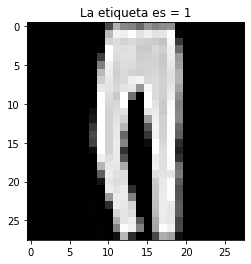

In [4]:
print('Forma del dataset = ',X_train_full.shape)
import matplotlib.pyplot as plt
import numpy as np
N = 285
plt.figure()
plt.imshow(X_train_full[N],cmap='gray', vmin=0, vmax=255)
plt.title("La etiqueta es = " +  str(int(y_train_full[N])))
print("Maximo = ",X_train_full.max()," Minimo = ",X_train_full.min())
print(np.unique(y_train_full))

En total tenemos $60$ mil imagenes en el conujunto de train. Las imagenes son matrices de $28 \times 28$ que representan prendas de vestir. Cada elemento de imagen tiene un valor que va entre $0$ y $255$. En total tenemos $10$ clases que debemos poder clasificar. Estas clases estan etiquetadas por un entero entre $[0,9]$.

A su vez ya podemos notar que tenemos una division entre Train y Test pero no tenemos un conjunto de validacion. Vamos a hacer este split y ademas vamos a normalizar los valores llevandolos del $[0,255] \rightarrow [0,1]$.

In [5]:
X_valid = X_train_full[:5000]/255
X_train = X_train_full[5000:]/255
y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]
print(len(X_train))
print(len(X_valid))

55000
5000


Las clases el libro dicen que son las siguientes:

Text(0.5, 1.0, 'La etiqueta es = Bolso')

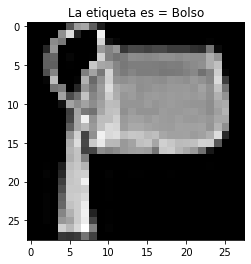

In [6]:
class_names = ["Remera","Pantalon","Pullover","Vestido","Saco","Sandalia","Camisa","Zapatilla","Bolso","Bota"]
plt.figure()
plt.imshow(X_train[N],cmap='gray', vmin=0, vmax=1)
plt.title("La etiqueta es = " +  class_names[y_train[N]])

Vamos a crear una red usando un diseño secuencial.

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(128,activation="relu"))
#model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
#model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5,validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7534 - accuracy: 0.7575 - val_loss: 0.5722 - val_accuracy: 0.8018
Epoch 2/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5212 - accuracy: 0.8214 - val_loss: 0.4818 - val_accuracy: 0.8420
Epoch 3/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4763 - accuracy: 0.8363 - val_loss: 0.4652 - val_accuracy: 0.8432
Epoch 4/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4509 - accuracy: 0.8431 - val_loss: 0.4355 - val_accuracy: 0.8546
Epoch 5/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4334 - accuracy: 0.8481 - val_loss: 0.4307 - val_accuracy: 0.8556


{'loss': [0.7533729672431946, 0.5211744904518127, 0.4762830138206482, 0.4508812129497528, 0.43338873982429504], 'accuracy': [0.7575091123580933, 0.821399986743927, 0.8362727165222168, 0.8431090712547302, 0.8480908870697021], 'val_loss': [0.5721741914749146, 0.48179715871810913, 0.46521177887916565, 0.4355241656303406, 0.4306589365005493], 'val_accuracy': [0.801800012588501, 0.8420000076293945, 0.8432000279426575, 0.8546000123023987, 0.8555999994277954]}


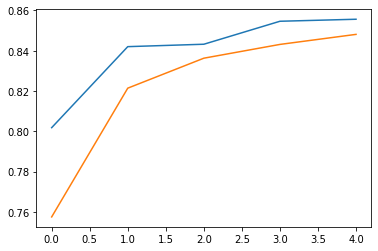

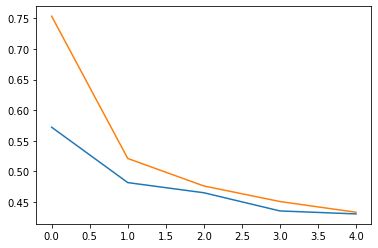

In [9]:
print(history.history)
plt.figure()
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

Vamos a evaluar el modelo sobre el test. Primero vamos a buscar el reporte de clasificacion que calcula Scikit-Learn y luego dibujar una matriz de confusion.

In [10]:
y_test_pred = model.predict(X_test)
evaluacion = model.evaluate(X_test, y_test)
print(evaluacion)
import pandas as pd
from sklearn.metrics import precision_score, recall_score, classification_report 
y_test_pred_categorical = np.argmax(y_test_pred, axis=-1)
reporte = classification_report(y_test, y_test_pred_categorical, target_names=class_names)
print(reporte)


313/313 [==============================] - 1s 2ms/step - loss: 85.0164 - accuracy: 0.7994
[85.01641845703125, 0.7993999719619751]
              precision    recall  f1-score   support

      Remera       0.79      0.83      0.81      1000
    Pantalon       0.96      0.96      0.96      1000
    Pullover       0.68      0.74      0.71      1000
     Vestido       0.88      0.80      0.84      1000
        Saco       0.58      0.89      0.70      1000
    Sandalia       1.00      0.70      0.82      1000
      Camisa       0.79      0.27      0.40      1000
   Zapatilla       0.88      0.86      0.87      1000
       Bolso       0.88      0.96      0.92      1000
        Bota       0.76      0.98      0.85      1000

    accuracy                           0.80     10000
   macro avg       0.82      0.80      0.79     10000
weighted avg       0.82      0.80      0.79     10000



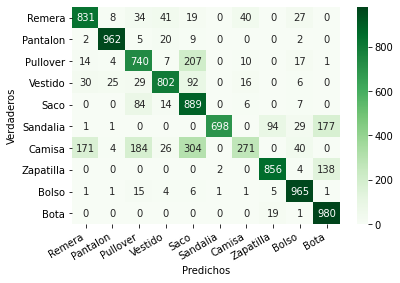

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred_categorical)

import seaborn as sns
import pandas as pd
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Greens")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('Verdaderos')
  plt.xlabel('Predichos');
clases = ('OTROS','CINCOS')

df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
plt.figure()
show_confusion_matrix(df_cm)

Ahora vamos a probar lo mismo pero sobre el conjunto de validacion.

              precision    recall  f1-score   support

      Remera       0.75      0.85      0.79       457
    Pantalon       0.96      0.97      0.96       556
    Pullover       0.70      0.82      0.76       504
     Vestido       0.87      0.87      0.87       501
        Saco       0.75      0.81      0.78       488
    Sandalia       0.95      0.94      0.94       493
      Camisa       0.77      0.45      0.57       493
   Zapatilla       0.96      0.90      0.93       512
       Bolso       0.92      0.96      0.94       490
        Bota       0.91      0.97      0.94       506

    accuracy                           0.86      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.86      0.86      0.85      5000



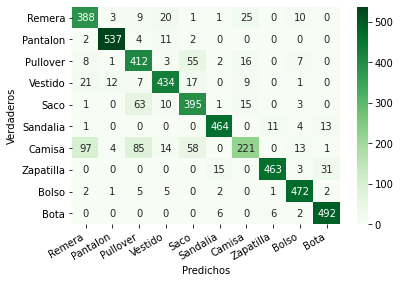

In [12]:
y_valid_pred = model.predict(X_valid)
y_valid_pred_categorical = np.argmax(y_valid_pred, axis=-1)
reporte = classification_report(y_valid, y_valid_pred_categorical, target_names=class_names)
print(reporte)
cm = confusion_matrix(y_valid, y_valid_pred_categorical)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
plt.figure()
show_confusion_matrix(df_cm)

Las clases en este problema estan bien balanceadas, pero podria no ser el caso. Para arreglar este eventual problema se puede solucionar cambiando los pesos sobre la funcion de _loss_. Para hacer esto no es necesario modificar a mano esta funcion sino que podemos pasar los pesos bajo el parametro _class_weight_ del metodo _fit_. De hecho, no solo podemos darle mayor peso relativo a una clase por sobre otra sino que podemos darle mas peso a una instancia particular por sobre otras. Esto puede ser util si la calidad de las etiquetas de cada instancia no es uniforme. Por ejmplo podriamos tener etiquetas elaboradas por un experto y otras elaboradas con algun metodo automatico de menor calidad. En este caso nos gustaria darle mayor peso a las etiquetas elaboradas por el experto. Esto se puede hacer mediante el parametro _sample_weight_ tambien del metodo _fit_.

(ESTARIA BUENO HACER UNA PRUEBA DE ESTO)